In [1]:
justpage/cjoda
from sklearn.cluster import KMeans

In [7]:
spotify = pd.read_csv(r"C:\Users\Marys\Downloads\Spotify_music.csv", index_col = 0, header = 0, encoding = 'latin1')

In [8]:
spotify.head()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
27,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,pop
89,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,pop
118,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,pop
129,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,pop
152,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,pop


In [9]:
spotify.shape

(6939, 16)

In [10]:
spotify = spotify.rename(columns = {'track_id: 0': 'id'})
spotify.head()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
27,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,pop
89,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,pop
118,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,pop
129,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,pop
152,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,pop


In [11]:
spotify.isnull().sum()

track_artist        0
track_popularity    0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Clusters            0
dtype: int64

In [12]:
spotify = spotify.drop_duplicates()
spotify.shape

(6939, 16)

In [15]:
spotify['playlist_genre'].value_counts()

0    1560
3    1318
5    1108
4    1076
2     956
1     921
Name: playlist_genre, dtype: int64

In [16]:
spotify.head()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
27,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,pop
89,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,pop
118,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,pop
129,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,pop
152,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,pop


In [17]:
new_df = spotify
new_df.track_artist.unique()

array([2893, 4606, 1571, ...,  711, 8362, 6140], dtype=int64)

In [18]:
new_df.isnull().any()
new_df = new_df.drop_duplicates()
new_df = new_df.reset_index(drop=True)
new_df.head()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
0,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,pop
1,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,pop
2,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,pop
3,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,pop
4,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,pop


In [19]:
colname=[]

for x in new_df.columns:
    if new_df[x].dtypes=='object':
        colname.append(x)
        
colname

['Clusters']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    new_df[x]= le.fit_transform(new_df[x])

In [21]:
new_df


,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
0,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,0
1,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,0
2,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,0
3,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,0
4,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,711,16,0,0.576,0.914,9,-4.037,0,0.0634,0.04700,0.006800,0.1830,0.687,127.940,187500,0
6935,257,0,0,0.701,0.607,1,-4.514,0,0.0547,0.00444,0.000041,0.0433,0.342,127.979,331000,0
6936,8362,0,0,0.627,0.832,6,-5.525,0,0.0478,0.00939,0.003050,0.1150,0.216,128.025,298125,0
6937,8746,14,0,0.529,0.821,6,-4.899,0,0.0481,0.10800,0.000001,0.1500,0.436,127.989,210112,0


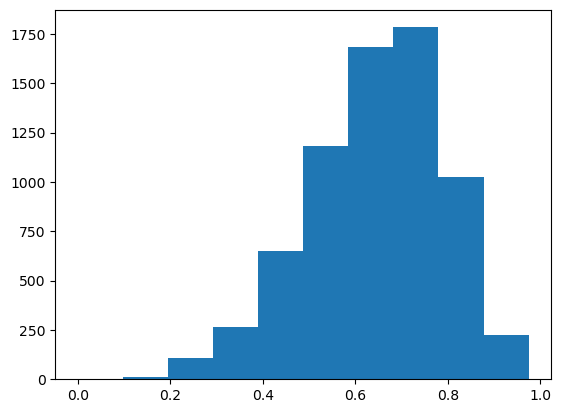

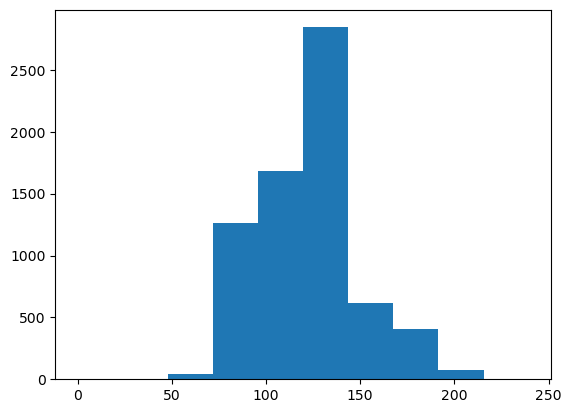

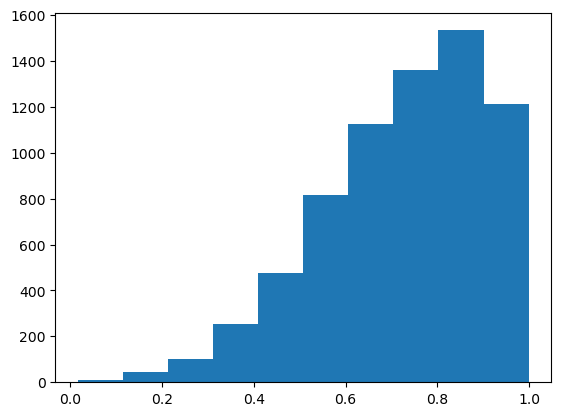

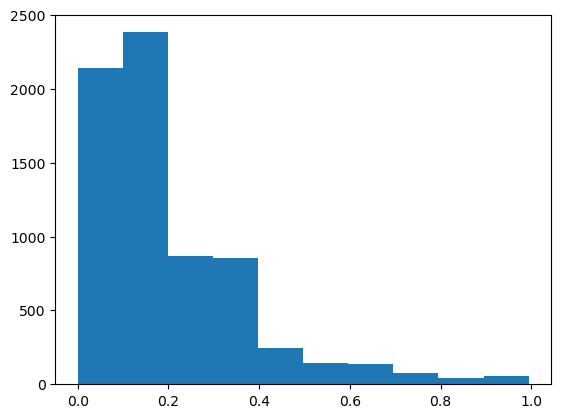

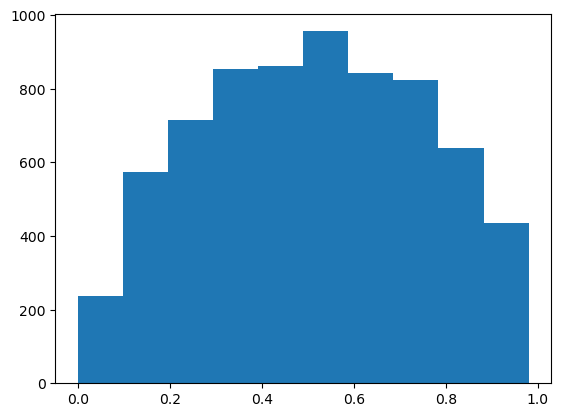

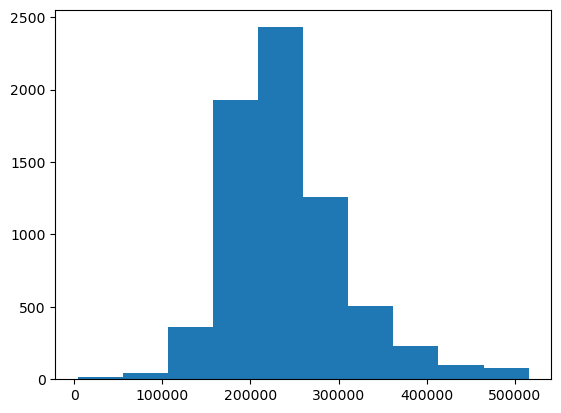

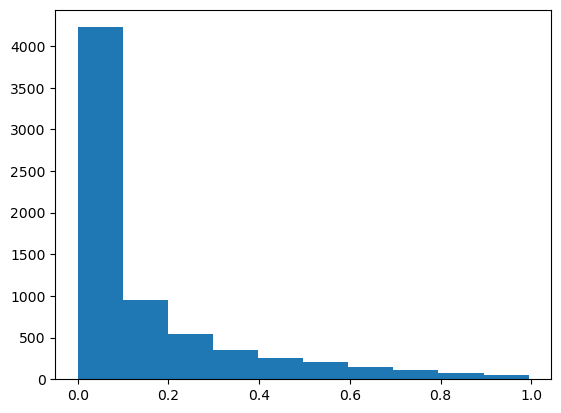

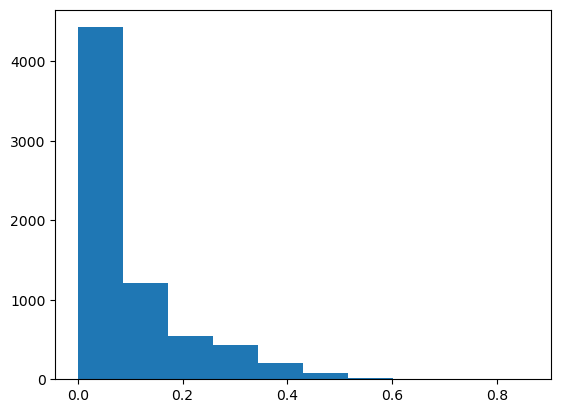

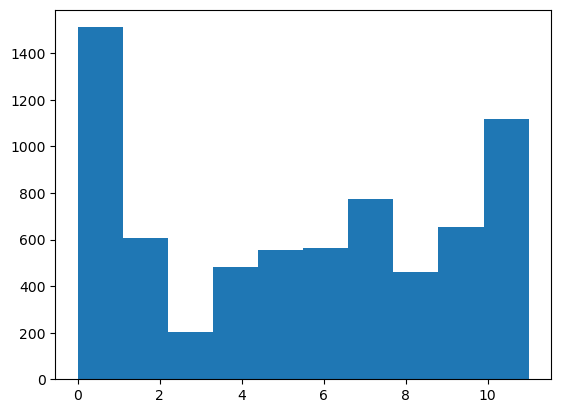

TypeError: object of type 'method' has no len()

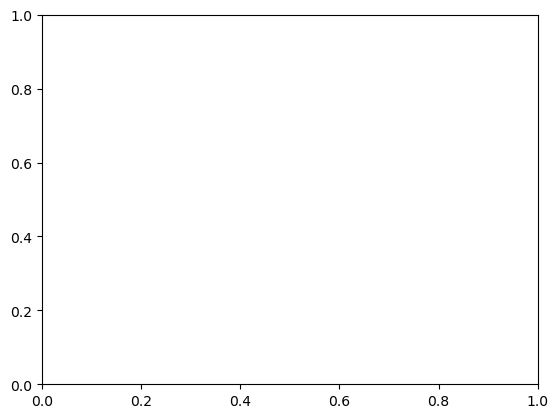

In [22]:
plt.hist(new_df.danceability)
plt.show()
plt.hist(new_df.tempo)
plt.show()
plt.hist(new_df.energy)
plt.show()
plt.hist(new_df.liveness)
plt.show()
plt.hist(new_df.valence)
plt.show()
plt.hist(new_df.duration_ms)
plt.show()
plt.hist(new_df.acousticness)
plt.show()
plt.hist(new_df.speechiness)
plt.show()
plt.hist(new_df.key)
plt.show()
plt.hist(new_df.mode)
plt.show()
plt.hist(new_df.loudness)
plt.show()
plt.hist(new_df.instrumentalness)
plt.show()

In [23]:
# Create x
x = new_df.values[:,[1,-1]]
#x = spotify.values[:,[3,9]]
x

array([[ 8.,  0.],
       [16.,  0.],
       [ 5.,  0.],
       ...,
       [ 0.,  0.],
       [14.,  0.],
       [15.,  0.]])

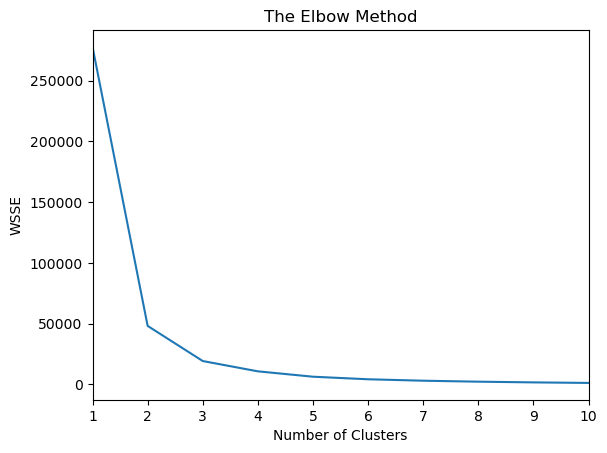

In [24]:
# Finding the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlim(1,10)
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 2, random_state = 10)

y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [26]:
kmeans.inertia_

48184.025787471255

In [27]:
kmeans.n_iter_

4

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 10)

y_pred = kmeans.fit_predict(x)
y_pred

array([2, 1, 2, ..., 0, 1, 1])

In [29]:
kmeans.inertia_

19287.92563362547

In [30]:
kmeans.n_iter_

2

In [31]:
kmeans = KMeans(n_clusters = 4, random_state = 10)

y_pred = kmeans.fit_predict(x)
y_pred

array([0, 2, 3, ..., 1, 2, 2])

In [32]:
kmeans.inertia_

10574.413107239874

In [33]:
kmeans.n_iter_

3

In [34]:
new_df['Clusters']= y_pred
new_df

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
0,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,0
1,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,2
2,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,3
3,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,2
4,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,711,16,0,0.576,0.914,9,-4.037,0,0.0634,0.04700,0.006800,0.1830,0.687,127.940,187500,2
6935,257,0,0,0.701,0.607,1,-4.514,0,0.0547,0.00444,0.000041,0.0433,0.342,127.979,331000,1
6936,8362,0,0,0.627,0.832,6,-5.525,0,0.0478,0.00939,0.003050,0.1150,0.216,128.025,298125,1
6937,8746,14,0,0.529,0.821,6,-4.899,0,0.0481,0.10800,0.000001,0.1500,0.436,127.989,210112,2


In [35]:
kmeans.cluster_centers_

array([[10.44811321,  0.        ],
       [ 0.36368778,  0.        ],
       [16.57035803,  0.        ],
       [ 4.73642732,  0.        ]])

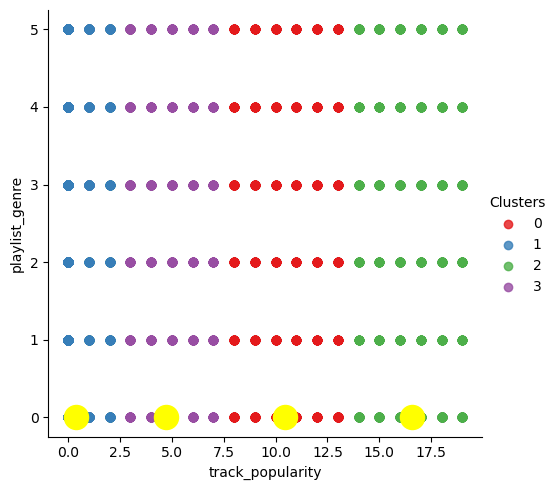

In [36]:
sns.lmplot(data = new_df, x = 'track_popularity', y = 'playlist_genre',
          fit_reg = False, #no regression line
          hue = 'Clusters', palette = 'Set1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'yellow')
plt.show()

In [37]:
new_df['Clusters'] = new_df.Clusters.map({0: 'pop', 1:'rap', 2: 'edm', 3:'latin',4: 'rock'})
new_df

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
0,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.03250,0.000000,0.3330,0.397,125.996,175000,pop
1,4606,16,2,0.652,0.898,7,-4.481,0,0.0361,0.29000,0.000000,0.0730,0.472,114.043,193377,edm
2,1571,5,2,0.611,0.737,0,-5.154,0,0.0476,0.01450,0.000000,0.1070,0.574,124.169,200318,latin
3,5489,18,2,0.514,0.856,2,-4.285,1,0.0717,0.00123,0.000006,0.5440,0.351,117.014,228502,edm
4,2545,19,2,0.503,0.727,1,-5.456,1,0.1670,0.01590,0.000095,0.0895,0.521,121.985,255632,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,711,16,0,0.576,0.914,9,-4.037,0,0.0634,0.04700,0.006800,0.1830,0.687,127.940,187500,edm
6935,257,0,0,0.701,0.607,1,-4.514,0,0.0547,0.00444,0.000041,0.0433,0.342,127.979,331000,rap
6936,8362,0,0,0.627,0.832,6,-5.525,0,0.0478,0.00939,0.003050,0.1150,0.216,128.025,298125,rap
6937,8746,14,0,0.529,0.821,6,-4.899,0,0.0481,0.10800,0.000001,0.1500,0.436,127.989,210112,edm


In [38]:
new_music = new_df[new_df['Clusters']=='pop']
new_music.shape

(1060, 16)

In [39]:
new_music

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Clusters
0,2893,8,2,0.663,0.905,1,-3.781,0,0.0511,0.032500,0.000000,0.3330,0.397,125.996,175000,pop
5,8543,8,2,0.432,0.740,7,-5.053,1,0.0620,0.034200,0.000007,0.1400,0.193,139.420,242520,pop
8,2893,9,2,0.733,0.839,1,-2.840,0,0.0335,0.014500,0.000187,0.1620,0.471,126.009,223533,pop
9,528,9,2,0.489,0.766,3,-5.840,1,0.0851,0.051100,0.000013,0.1260,0.117,121.445,190645,pop
11,3695,11,2,0.620,0.906,11,-3.638,0,0.0627,0.102000,0.020600,0.1830,0.398,123.047,221773,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,4885,13,0,0.509,0.669,5,-7.922,0,0.0455,0.053600,0.008350,0.3390,0.413,126.971,238360,pop
6917,9487,12,0,0.490,0.835,8,-5.700,0,0.0894,0.000254,0.009760,0.3850,0.330,128.031,178533,pop
6926,1779,12,0,0.616,0.884,7,-3.675,0,0.0375,0.000048,0.000495,0.3290,0.624,129.958,222000,pop
6928,7575,11,0,0.490,0.866,7,-3.152,1,0.0406,0.018200,0.000000,0.1060,0.185,127.998,219844,pop


In [40]:
new_music.to_excel(r'Spotify_music.xlsx', index = True)